<a href="https://colab.research.google.com/github/afullhart/climateanalogs/blob/main/Figures/Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%reset -f

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rioxarray
!pip install cartopy

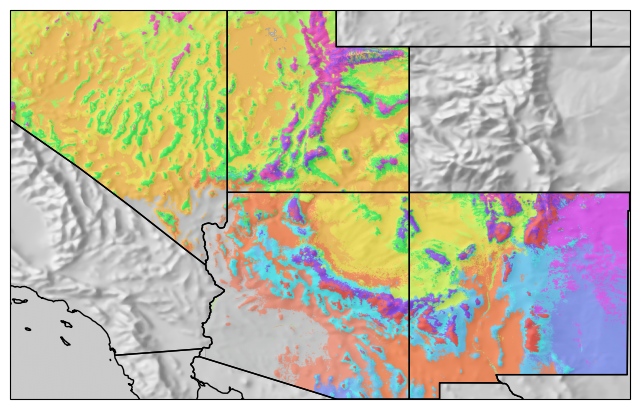

In [10]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.image import imread
import rioxarray as xr
import cartopy.crs as ccrs
import cartopy
import PIL
from PIL import Image
PIL.Image.MAX_IMAGE_PIXELS = None
import numpy as np

isof ='/content/drive/My Drive/Colab Notebooks/Analogs/IsoCluster.tif'
'https://www.naturalearthdata.com/downloads/10m-raster-data/10m-manual-shaded-relief/'
fname = '/content/drive/My Drive/Colab Notebooks/Analogs/US_MSR_ProjectRaster.tif'

image = Image.open(fname).convert('L')
arr = np.asarray(image)

im = xr.open_rasterio(isof)
lon_min = im.rio.bounds()[0]
lat_min = im.rio.bounds()[1]
lon_max = im.rio.bounds()[2]
lat_max = im.rio.bounds()[3]
im = im[0].where(im[0] > 0, np.nan)



colors = ['#BDBEBE', '#F4714F', '#FF611B', '#FBAF1C', '#F8E019', '#CCFE29', '#91FE28', '#00FE24', '#18F2FE', '#3AC2FD', '#5E79FD', '#6E12FC', '#E21DFD', '#FF18A9', '#FF2B18']
#colors = ['red', 'green', 'blue', 'yellow', 'red', 'green', 'blue', 'yellow', 'red', 'green', 'blue', 'yellow', 'red', 'green', 'blue']
cmap = mcolors.ListedColormap(colors)

#fig, ax = plt.subplots(figsize=(8, 5), subplot_kw={'projection': ccrs.PlateCarree()})
fig, ax = plt.subplots(figsize=(8, 16), subplot_kw={'projection': ccrs.PlateCarree()})
#fig.tight_layout()

ax.set_extent([-120, -102.991, 31.333, 42.008])
ax.add_feature(cartopy.feature.STATES, linewidth=1)
#ax.imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
#          extent=[-134.030437, -51.988941, 5.977019, 56.007958])
ax.imshow(arr, origin='upper', transform=ccrs.PlateCarree(), cmap='gray', vmin=0, vmax=255,
          extent=[-134.030437, -51.988941, 5.977019, 56.007958])

ax.imshow(im,
          extent=[lon_min, lon_max, lat_min, lat_max],
          origin='upper',
          vmin=1,
          vmax=15,
          alpha=0.6,
          cmap=cmap)




In [ ]:
print(cartopy.crs.CRS)

<class 'cartopy.crs.CRS'>


<GeoAxes: >

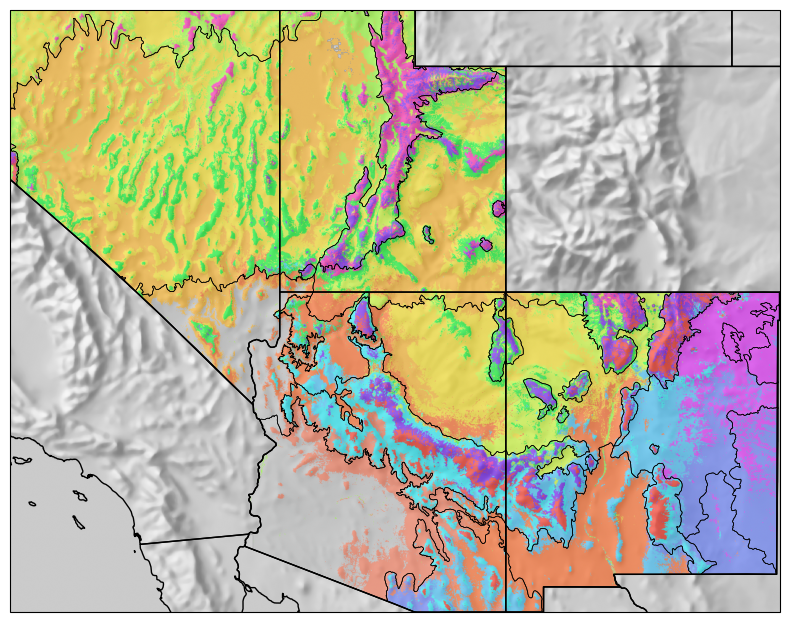

In [23]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.image import imread
import rioxarray as xr
import rasterio
import cartopy.crs as ccrs
import cartopy
import geopandas as gpd
import PIL
from PIL import Image
PIL.Image.MAX_IMAGE_PIXELS = None
import numpy as np

isof = '/content/drive/My Drive/Colab Notebooks/Analogs/IsoCluster.tif'
eco3f = '/content/drive/My Drive/Colab Notebooks/Analogs/us_eco_l3_clip/us_eco_l3_clip.shp'
eco4f = '/content/drive/My Drive/Colab Notebooks/Analogs/us_eco_l4_clip/us_eco_l4_clip.shp'
'https://www.naturalearthdata.com/downloads/10m-raster-data/10m-manual-shaded-relief/'
fname = '/content/drive/My Drive/Colab Notebooks/Analogs/US_MSR_ProjectRaster.tif'

with rasterio.open(isof) as src:
  raster_data = src.read(1)
  raster_transform = src.transform
  raster_crs = src.crs

image = Image.open(fname).convert('L')
arr = np.asarray(image)

im = xr.open_rasterio(isof)
lon_min = im.rio.bounds()[0]
lat_min = im.rio.bounds()[1]
lon_max = im.rio.bounds()[2]
lat_max = im.rio.bounds()[3]
im = im[0].where(im[0] > 0, np.nan)

eco3_gdf = gpd.read_file(eco3f)
if eco3_gdf.crs != raster_crs:
  eco3_gdf = eco3_gdf.to_crs(raster_crs)

eco4_gdf = gpd.read_file(eco4f)
if eco4_gdf.crs != raster_crs:
  eco4_gdf = eco4_gdf.to_crs(raster_crs)

colors = ['#BDBEBE', '#F4714F', '#FF611B', '#FBAF1C', '#F8E019', '#CCFE29', '#91FE28', '#00FE24', '#18F2FE', '#3AC2FD', '#5E79FD', '#6E12FC', '#E21DFD', '#FF18A9', '#FF2B18']
cmap = mcolors.ListedColormap(colors)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
fig.tight_layout()

ax.set_extent([-120, -102.991, 31.333, 42.008])
ax.add_feature(cartopy.feature.STATES, linewidth=1)

ax.imshow(arr, origin='upper', transform=ccrs.PlateCarree(), cmap='gray', vmin=0, vmax=255,
          extent=[-134.030437, -51.988941, 5.977019, 56.007958])

ax.imshow(im,
          extent=[lon_min, lon_max, lat_min, lat_max],
          origin='upper',
          vmin=1,
          vmax=15,
          alpha=0.6,
          cmap=cmap)

#eco4_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.1)
eco3_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)




<GeoAxes: >

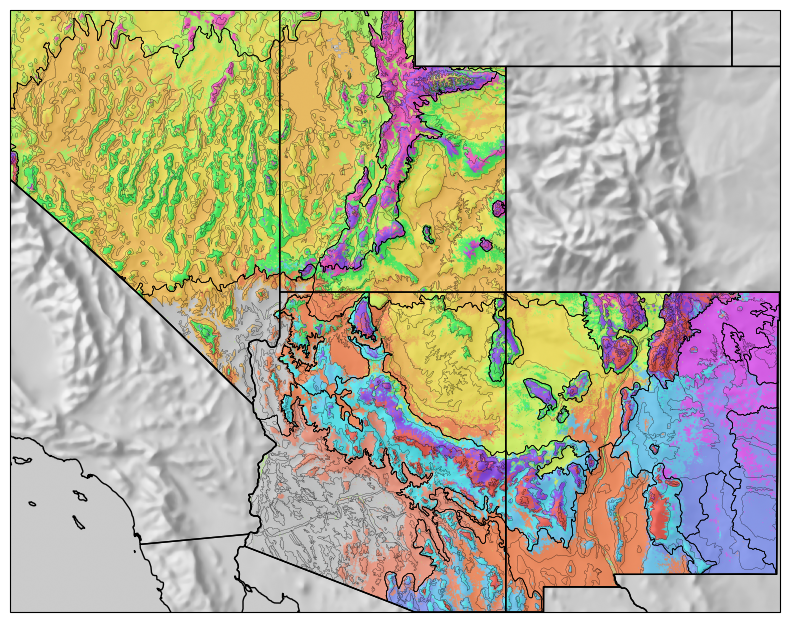

In [6]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.image import imread
import rioxarray as xr
import rasterio
import cartopy.crs as ccrs
import cartopy
import geopandas as gpd
import PIL
from PIL import Image
PIL.Image.MAX_IMAGE_PIXELS = None
import numpy as np

isof = '/content/drive/My Drive/Colab Notebooks/Analogs/IsoCluster.tif'
eco3f = '/content/drive/My Drive/Colab Notebooks/Analogs/us_eco_l3_clip/us_eco_l3_clip.shp'
eco4f = '/content/drive/My Drive/Colab Notebooks/Analogs/us_eco_l4_clip/us_eco_l4_clip.shp'
'https://www.naturalearthdata.com/downloads/10m-raster-data/10m-manual-shaded-relief/'
fname = '/content/drive/My Drive/Colab Notebooks/Analogs/US_MSR_ProjectRaster.tif'

with rasterio.open(isof) as src:
  raster_data = src.read(1)
  raster_transform = src.transform
  raster_crs = src.crs

image = Image.open(fname).convert('L')
arr = np.asarray(image)

im = xr.open_rasterio(isof)
lon_min = im.rio.bounds()[0]
lat_min = im.rio.bounds()[1]
lon_max = im.rio.bounds()[2]
lat_max = im.rio.bounds()[3]
im = im[0].where(im[0] > 0, np.nan)

eco3_gdf = gpd.read_file(eco3f)
if eco3_gdf.crs != raster_crs:
  eco3_gdf = eco3_gdf.to_crs(raster_crs)

eco4_gdf = gpd.read_file(eco4f)
if eco4_gdf.crs != raster_crs:
  eco4_gdf = eco4_gdf.to_crs(raster_crs)

colors = ['#BDBEBE', '#F4714F', '#FF611B', '#FBAF1C', '#F8E019', '#CCFE29', '#91FE28', '#00FE24', '#18F2FE', '#3AC2FD', '#5E79FD', '#6E12FC', '#E21DFD', '#FF18A9', '#FF2B18']
cmap = mcolors.ListedColormap(colors)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
fig.tight_layout()

ax.set_extent([-120, -102.991, 31.333, 42.008])
ax.add_feature(cartopy.feature.STATES, linewidth=1)

ax.imshow(arr, origin='upper', transform=ccrs.PlateCarree(), cmap='gray', vmin=0, vmax=255,
          extent=[-134.030437, -51.988941, 5.977019, 56.007958])

ax.imshow(im,
          extent=[lon_min, lon_max, lat_min, lat_max],
          origin='upper',
          vmin=1,
          vmax=15,
          alpha=0.6,
          cmap=cmap)

eco4_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.1)
eco3_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)


